<a href="https://colab.research.google.com/github/tiwarikaran/Why-Children-Do-not-go-to-school/blob/main/Reasons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [47]:
df = pd.read_excel('Merge Entry_2009-10.xlsx',header = 1);df.head(1)

,Sr. \nNo.,Form No.,CPS No,CPS \nName,School code,Name of School,Village Name,Medium,Full Name,Gender,DOB\n(DD/MM/YYYY),Mobile No,Full address,Father's Name,Mother's name,Religion,Social Group,Caste,Father's Educational Level,Mother's Educational Level,Father's Occupation,Mother's Occupation,Father's Monthly Income,Mother's Monthly Income,Dropout Std,Dropout Year,Dropout School,Primary - Distance from Resistance,Upper Primary - Distance from Resistance,Secondary - Distance from Resistance,Mode of Transport,Time,Parents - Why did your children have stoped going to schoool,Students - Why did your children have stoped going to schoool,Subjects you like most,Subject difficult for you,Parents - Do you want to send your child/go back to schools,Students - Do you want to send your child/go back to schools,Parents - Was you/your family checking your result regularly,studentss - Was you/your family checking your result regularly,Parents - Will you rejoin school if Bicycle will be provided by the Education Dept.,Students - Will you rejoin school if Bicycle will be provided by the Education Dept.,"Parents - Did you attended any Parents Meeting, if Yes, How Many Times","Students - Did you attended any Parents Meeting, if Yes, How Many Times",Parents - Did you Check class attendence of your child,Parents - Did you talk to the class Teacher of your child about your decision of Dropping out,Parents - Financial Assistance needs to be introduced?,Parents - What should be the amount of Financial assistance per month?,What are you doing now?,What is required for you to rejoin the school,Name of child,Age,Gender.1,Study Level,Status,"Parents - Probable reeasons of Dropout from school, Parents - Probable reasons of Dropout from school",Students - Probable reeasons of Dropout from school,Any Other Reasons (Specify),Surveyor's Observations and Remarks,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62
0,1,1/10,1/125,AMBOLI GM,26010103601,C.P.S. AMBOLI GUJ.MED.,AMBOLI,GUJARATI,SAYRESH VISHNU GORAT,M,2003-09-06 00:00:00,9574428933,"DUNGRIPADA, AMBOLI",VISHNUBHAI NATHUBHAI GORAT,SAVITABEN VISHNUBHAI GORAT,Hindu,ST,Varli,Illeterate,Illeterate,Farmer,Farmer,4000,NaN,8,"2019,\nAge : 17 yrs.",AMBOLI (G.M.),NaN,0.5,NaN,WALK,10,SEND HIM BUT DON'T WANT TO GO TO SCHOOL,AGREE TO COME TO SCHOOL,"English, Gujarati, Hindi",Maths,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AT HOME & DO HOUSE WORK,NaN,KUNTI,8,F,3,CONTINUING,Engaged in Household Work,Engaged in Household Work,NaN,THE CHILD HAS NOT GIVEN ANY REASON TO GO TO SC...,NaN,Lack of interest in study,NaN,NaN


In [48]:
df.isnull().sum()

Sr. \nNo.                                 0
Form No.                                  0
CPS No                                    0
CPS \nName                                0
School code                               0
                                       ... 
Surveyor's Observations and Remarks      14
Unnamed: 59                            1535
Unnamed: 60                            1521
Unnamed: 61                            1536
Unnamed: 62                            1536
Length: 63, dtype: int64

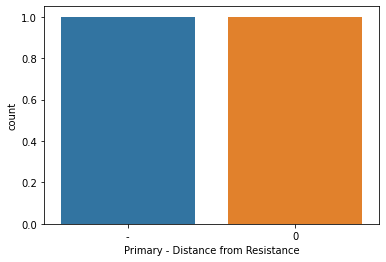

In [49]:
_ = sns.countplot(x = df['Primary - Distance from Resistance'][df['Primary - Distance from Resistance'].notnull().value_counts()])

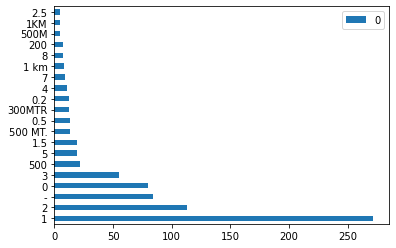

In [50]:
_ = pd.DataFrame(df[df['Primary - Distance from Resistance'].notnull()]['Primary - Distance from Resistance'].value_counts().values[0:20],
             index=df[df['Primary - Distance from Resistance'].notnull()]['Primary - Distance from Resistance'].value_counts().index[0:20]).plot(kind = 'barh')

In [51]:
df.groupby(['Medium'])['Father\'s Monthly Income'].count()

Medium
ENGLISH      80
GUJARATI    659
HINDI         8
MARATHI     237
Name: Father's Monthly Income, dtype: int64

In [52]:
2500

2500

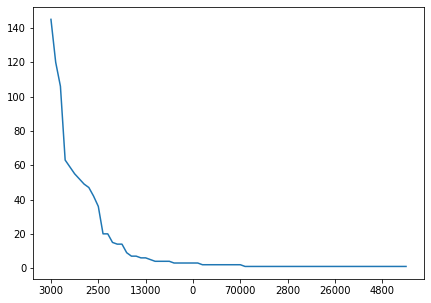

In [53]:
plt.figure(figsize=(7,5))
(df['Father\'s Monthly Income']).value_counts().plot()

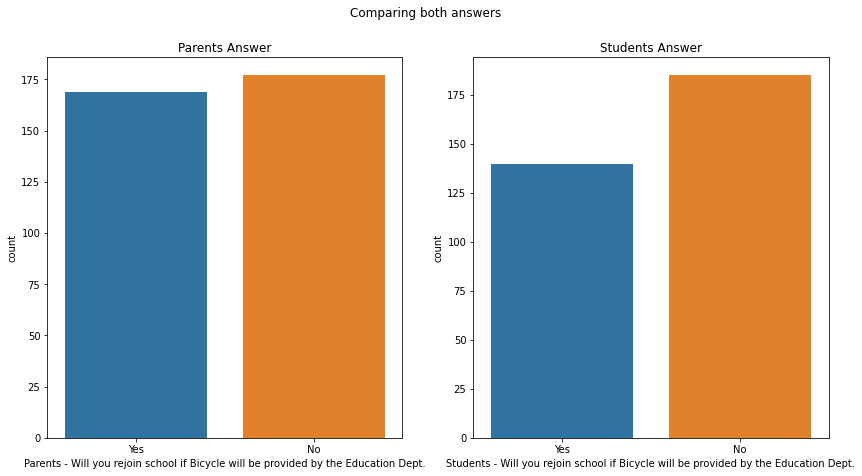

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
sns.countplot(x = df['Parents - Will you rejoin school if Bicycle will be provided by the Education Dept.'],ax = ax[0])
ax[0].set_title('Parents Answer')
sns.countplot(x = df['Students - Will you rejoin school if Bicycle will be provided by the Education Dept.'],ax = ax[1])
ax[1].set_title('Students Answer')
fig.suptitle('Comparing both answers')
#display(fig)
plt.show()

In [55]:
df['Status'].value_counts().sort_values()

CONTINUING                                            1
1) DROPOUT\n2) STUDYING\n3) DROPOUT\n4) STUDYING      1
1) -\n2) DROPOUT                                      1
PVT SERVICE\nFARMER\nPVT SERVICE                      1
CONTINUING DTUDY                                      1
                                                   ... 
DROPOUT                                              26
CONTINUING STUDY                                     30
-                                                    40
CONTINUING STUDY\nCONTINUING STUDY                   45
CONTINUING STUDY                                    100
Name: Status, Length: 240, dtype: int64

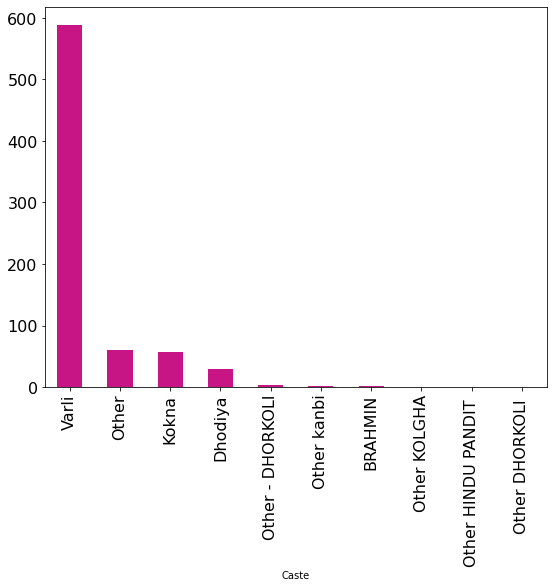

In [84]:
_ = df.groupby(['Caste'])['Status'].count().sort_values(ascending = False).plot.bar(figsize = (9,7),color='mediumvioletred',fontsize=16)

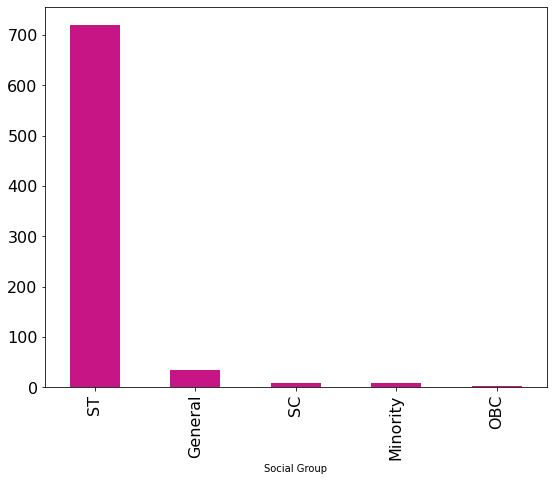

In [83]:
_ = df.groupby(['Social Group'])['Status'].count().sort_values(ascending = False).plot.bar(figsize = (9,7),color='mediumvioletred',fontsize=16)

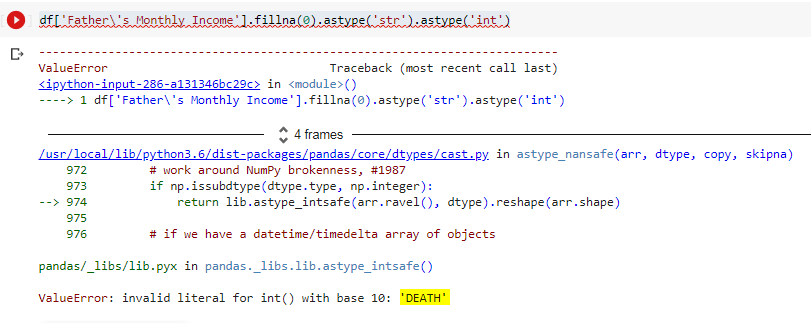

In [58]:
df.loc[df['Father\'s Monthly Income'] == 'DEATH', ['Father\'s Monthly Income']] = 0

In [59]:
df.loc[df['Father\'s Monthly Income'] == '-', ['Father\'s Monthly Income']] = 0

In [60]:
df['Father\'s Monthly Income'].fillna(0).astype(str).astype(int)

0        4000
1        3000
2        2000
3        3000
4        3000
        ...  
1532        0
1533     7000
1534        0
1535      500
1536    10000
Name: Father's Monthly Income, Length: 1537, dtype: int64

In [61]:
df['Father\'s Monthly Income'] = df['Father\'s Monthly Income'].fillna(0).astype(str).astype(int)

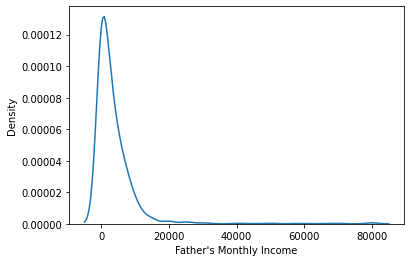

In [82]:
_ = sns.kdeplot((df['Father\'s Monthly Income']))

In [63]:
df['Father\'s Educational Level'].value_counts()

Illeterate     730
Primary        307
Up.Pri         101
Matriculate     91
-               10
Graduate         9
Name: Father's Educational Level, dtype: int64

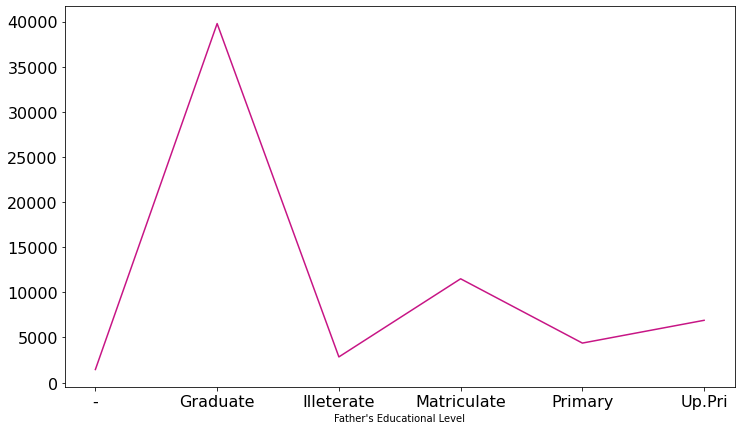

In [64]:
_ = df.groupby('Father\'s Educational Level')['Father\'s Monthly Income'].mean().sort_index().plot(figsize = (12,7),color='mediumvioletred',fontsize = 16)

A very interesting pattern is noticed below

In [65]:
df['Father\'s Educational Level'].unique()

array(['Illeterate', 'Primary', 'Up.Pri', 'Matriculate', 'Graduate', nan,
       '-'], dtype=object)

In [66]:
df[df['Father\'s Educational Level']=='Illeterate']['Status'].value_counts().sort_values(ascending = False)[0:50]

CONTINUING STUDY                                                          50
-                                                                         37
CONTINUING STUDY\nCONTINUING STUDY                                        25
DROPOUT\nDROPOUT\nDROPOUT                                                 15
DROPOUT                                                                   14
CONTINUING                                                                14
DROPOUT\nDROPOUT                                                          11
CONTINUING STUDY\nCONTINUING STUDY\nCONTINUING STUDY                      11
CONTINUING\nCONTINUING                                                     8
DROPOUT\nCONTINUING STUDY                                                  7
DROP OUT\nDROP OUT                                                         7
1) STUDYING                                                                7
1) STUDYING\n2) STUDYING                                                   6

In [67]:
df[df['Father\'s Educational Level']=='Primary']['Status'].value_counts().sort_values(ascending = False)[0:50]

CONTINUING STUDY                                                            28
CONTINUING STUDY                                                            14
CONTINUING\nCONTINUING                                                      12
DROPOUT\nDROPOUT                                                             9
CONTINUING STUDY\nCONTINUING STUDY                                           9
DROPOUT                                                                      6
CONTINUING                                                                   5
STUDYING                                                                     5
DROP OUT\nDROP OUT                                                           4
CONTINUING STUDY\nCONTINUING STUDY\nCONTINUING STUDY                         4
DROP-OUT                                                                     4
DROPOUT\nCONTINUING STUDY\nCONTINUING STUDY                                  3
CONTINUING STUDY \nCONTINUING STUDY                 

In [68]:
df[df['Father\'s Educational Level']=='Up.Pri']['Status'].value_counts().sort_values(ascending = False)[0:50]

CONTINUING STUDY                                                                    8
CONTINUING STUDY\nCONTINUING STUDY                                                  4
CONTINUING STUDY                                                                    4
STUDYING                                                                            4
DROPOUT                                                                             2
DROPOUT\nDROPOUT\nDROPOUT                                                           2
DROPOUT                                                                             2
CONTINUING\nCONTINUING                                                              2
DROPOUT,CONTINUING STUDY                                                            1
1) STUDYING\n2) STUDYING\n3) STUDYING                                               1
DROPOUT\nDROPOUT\nDROPOUT\nCONTINUING STUDY                                         1
CONTUINING STUDY \nCONTINUING STUDY                   

In [69]:
df[df['Father\'s Educational Level']=='Matriculate']['Status'].value_counts().sort_values(ascending = False)[0:50]

CONTINUING STUDY                                        9
CONTINUING STUDY                                        8
CONTINUING STUDY\nCONTINUING STUDY                      3
1) STUDYING\n2) STUDYING\n3) STUDYING                   2
DROPOUT                                                 2
STUDYING                                                2
-                                                       1
DROUPOUT, DROUPOUT                                      1
CONTINUING\nCONTINUING\nDROPOUT                         1
CONTINUING STUDIES                                      1
EDUCATIO COMPLETED\nSERVICE                             1
_\n_\n_\nCONTINUING                                     1
CONTIUING STUDY                                         1
CONTINUING STUDY \nCONTINUING STUDY                     1
STUDYING IN 8TH                                         1
 1 DROPOUT\n                                            1
CONTINUING STUDY\nCONTINUING STUDY\nCONTINUING STUDY    1
CONTINUNG STUD

In [70]:
df[df['Father\'s Educational Level']=='Graduate']['Status'].value_counts().sort_values(ascending = False)[0:50]

CONTINUING\nCONTINUING                  2
CONTINUING STUDY \nCONTINUING STUDY     1
Name: Status, dtype: int64

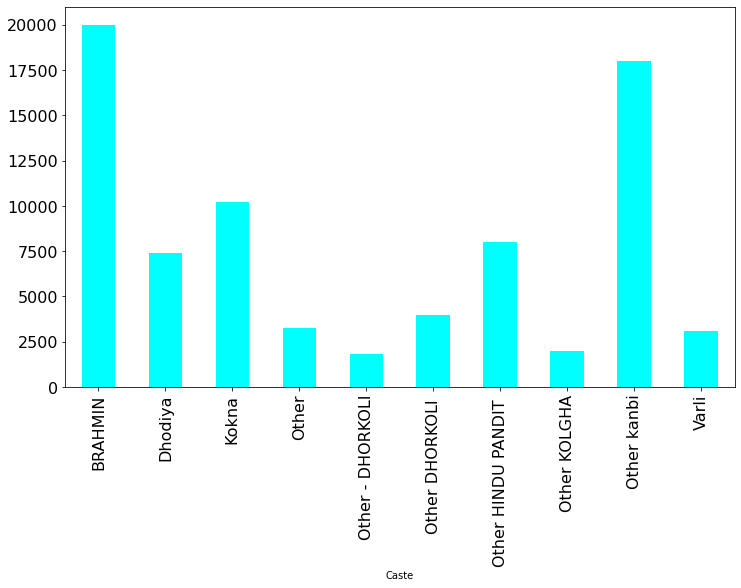

In [71]:
df.groupby(['Caste'])['Father\'s Monthly Income'].mean().sort_index().plot.bar(figsize = (12,7),fontsize = 16,color = 'cyan')

In [72]:
df.columns

Index(['Sr. \nNo.', 'Form No.', 'CPS No', 'CPS \nName', 'School code',
       'Name of School', 'Village Name', 'Medium', 'Full Name', 'Gender',
       'DOB\n(DD/MM/YYYY)', 'Mobile No', 'Full address', 'Father's Name',
       'Mother's name', 'Religion', 'Social Group', 'Caste',
       'Father's Educational Level', 'Mother's Educational Level',
       'Father's Occupation', 'Mother's Occupation', 'Father's Monthly Income',
       'Mother's Monthly Income', 'Dropout Std', 'Dropout Year',
       'Dropout School', 'Primary - Distance from Resistance',
       'Upper Primary - Distance from Resistance',
       'Secondary - Distance from Resistance', 'Mode of Transport', 'Time',
       'Parents - Why did your children have stoped going to schoool',
       'Students - Why did your children have stoped going to schoool',
       'Subjects you like most', 'Subject difficult for you',
       'Parents - Do you want to send your child/go back to schools',
       'Students - Do you want to send your

In [73]:
df['What is required for you to rejoin the school'].fillna('').unique()

array(['', "DON'T WANT TO GO TO SCHOOL", "DON'T WANT TO STUDY",
       'IF PASSED 10th THEN GO TO SCHOOL', 'STUDYING IN 12th',
       'BICYCLE,UNIFORM, MOBILE', 'BICYCLE ',
       "NOTHING, DON'T WANT TO GO TO SCHOOL", "DON'T WANT T O STUDY",
       'NOTHING', 'NOT INTERESTED IN STUDY', 'LACK OF INTERSEST IN STUDY',
       'VEHICLE CONVENIENCE', 'IF THERE IS A VEHICLE FACILITY',
       'NOT JOIN THE SCHOOL', 'IF GET ALL DOCUMENT WILL STUDY',
       'REFUSES TO GO TO SCHOOL. ADMISSION GIVEN AT GHSS KHANVEL',
       'REFUSES TO GO TO SCHOOL.',
       "DON'T WANT TO GO TO SCHOOL. NOT  GIVE AN ADMISSION", 'NO',
       'FINANCIAL SUPPORT, TRANSPORATION & HOSTEL FACILITY IF PROVIDE.',
       'wiling rejoin school the financial assistance and transportation facility required gaidance from techer to pass the subject',
       'BECAUSE OF MIGRATED', 'HE IS ALREADY STUDYING',
       'IF I AM GIVEN A BICYCLE, I WANT TO GO TO SCHOOL.', 'NO REQUIRED',
       'NOT JUST GOING TO SCHOOL.',
       'GOOD

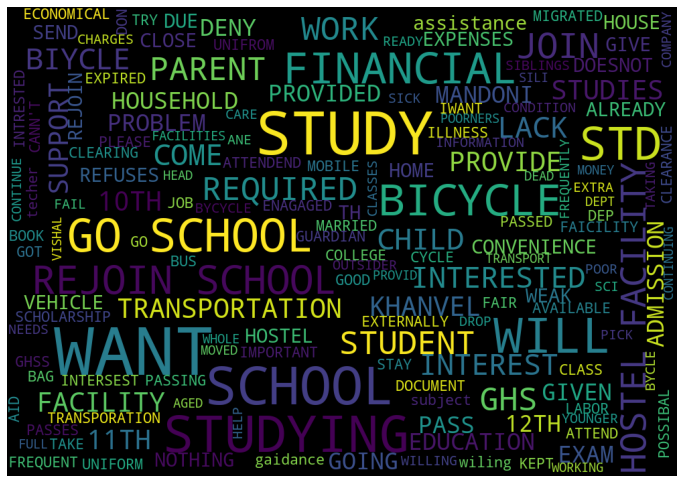

In [74]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['What is required for you to rejoin the school'].fillna('').unique()]) 
wordcloud = WordCloud(width=1000, height=700, random_state=21, max_font_size=100).generate(all_words)
plt.figure(figsize=(12, 9))
plt.imshow(wordcloud,)# interpolation="bilinear")
plt.axis('off')
plt.show()

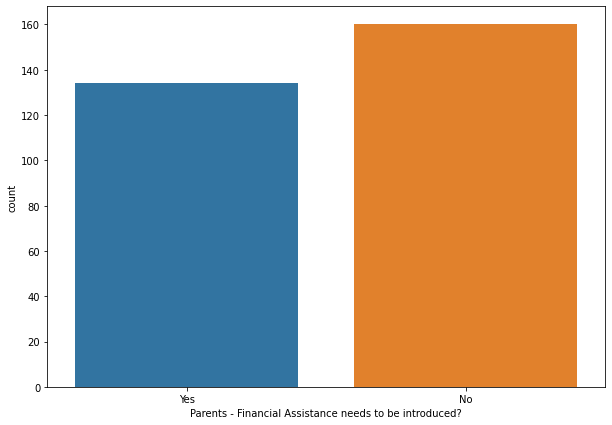

In [75]:
plt.figure(figsize=(10,7))
_ = sns.countplot(x=df[df['Parents - Financial Assistance needs to be introduced?'].notnull()]['Parents - Financial Assistance needs to be introduced?'])

In [76]:
df['Father\'s Educational Level'].unique()

array(['Illeterate', 'Primary', 'Up.Pri', 'Matriculate', 'Graduate', nan,
       '-'], dtype=object)

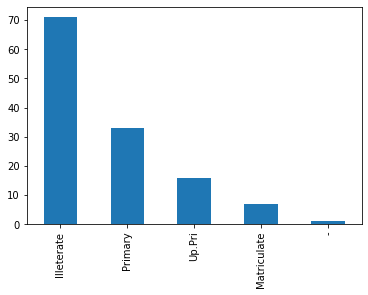

In [86]:
_ = df[df['Parents - Financial Assistance needs to be introduced?']=='Yes']['Father\'s Educational Level'].value_counts().plot.bar()

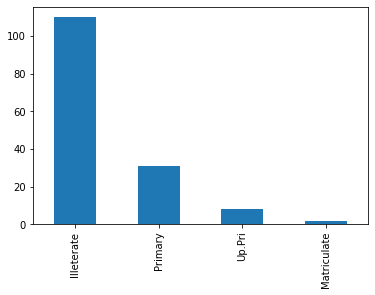

In [85]:
_ = df[df['Parents - Financial Assistance needs to be introduced?']=='No']['Father\'s Educational Level'].value_counts().plot.bar()

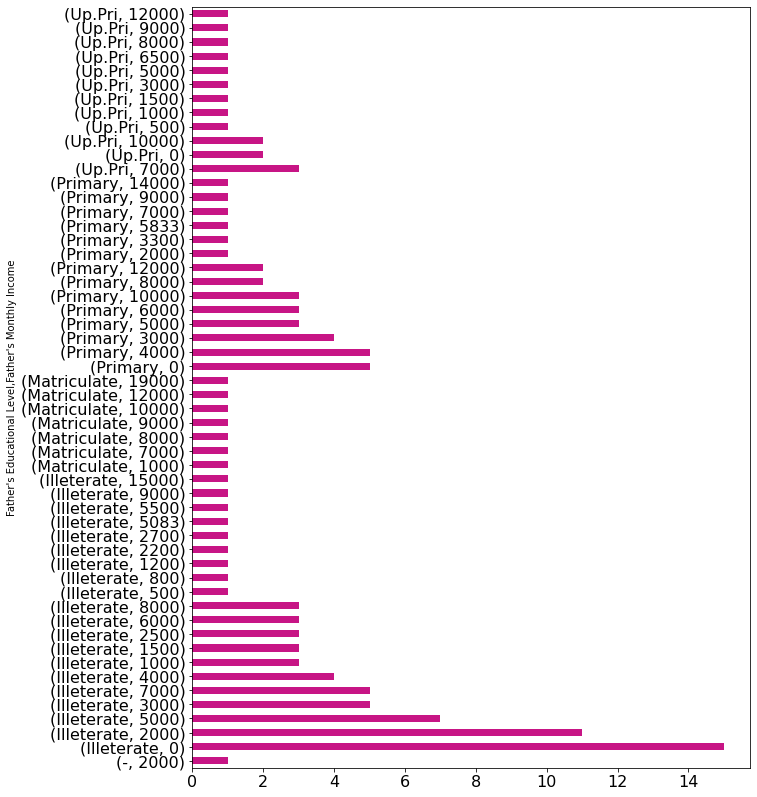

In [87]:
_ = df[df['Parents - Financial Assistance needs to be introduced?']=='Yes'].groupby(['Father\'s Educational Level',])['Father\'s Monthly Income'].value_counts().plot(kind = 'barh',figsize = (10,14),color='mediumvioletred',fontsize=16)

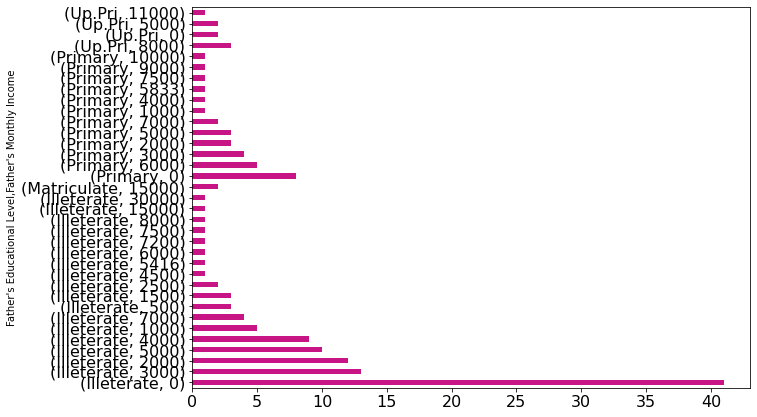

In [88]:
_ = df[df['Parents - Financial Assistance needs to be introduced?']=='No'].groupby(['Father\'s Educational Level',])['Father\'s Monthly Income'].value_counts().plot(kind = 'barh',figsize = (10,7),color='mediumvioletred',fontsize=16)

In [89]:
list_of_tweets = query_tweets("#rural_education",None, begindate=dt.date(2009, 5, 7),enddate=dt.date(2010,5,7), poolsize=9, lang='');list_of_tweets

NameError: ignored

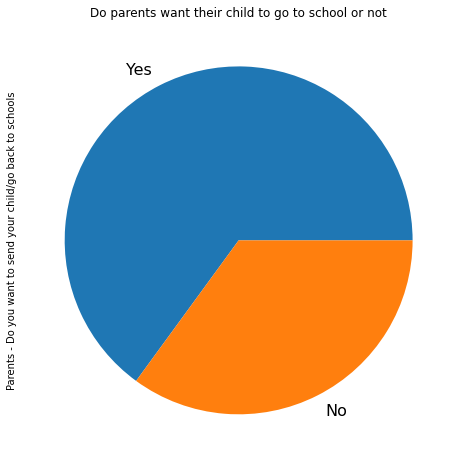

In [90]:
_ =df['Parents - Do you want to send your child/go back to schools'].value_counts().plot(kind = 'pie',figsize = (12,8),fontsize = 16)
_ = plt.title('Do parents want their child to go to school or not')

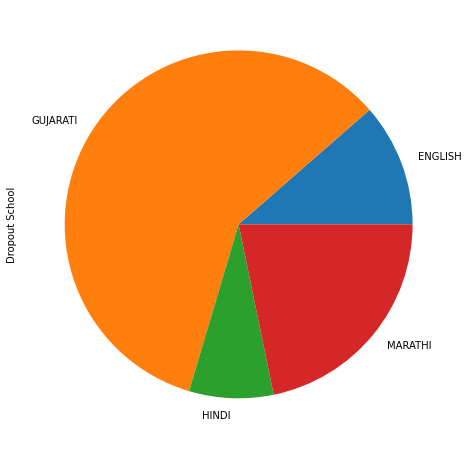

In [91]:
_ = plt.figure(figsize=(12,8))
_ = df.groupby(['Medium'])['Dropout School'].count().plot(kind = 'pie')

In [92]:
df[df['Medium']=='GUJARATI']["Parents - Why did your children have stoped going to schoool"].iloc[1]

'TRY TO SEND HIM TO GO TO SCHOOL HE GAVE THEM THREATENS TO DIE. '

In [93]:
data = pd.DataFrame()
data['parent_why_child_stopped'] = df['Parents - Why did your children have stoped going to schoool']

In [94]:
parents =  data[data['parent_why_child_stopped'].notnull()].copy()

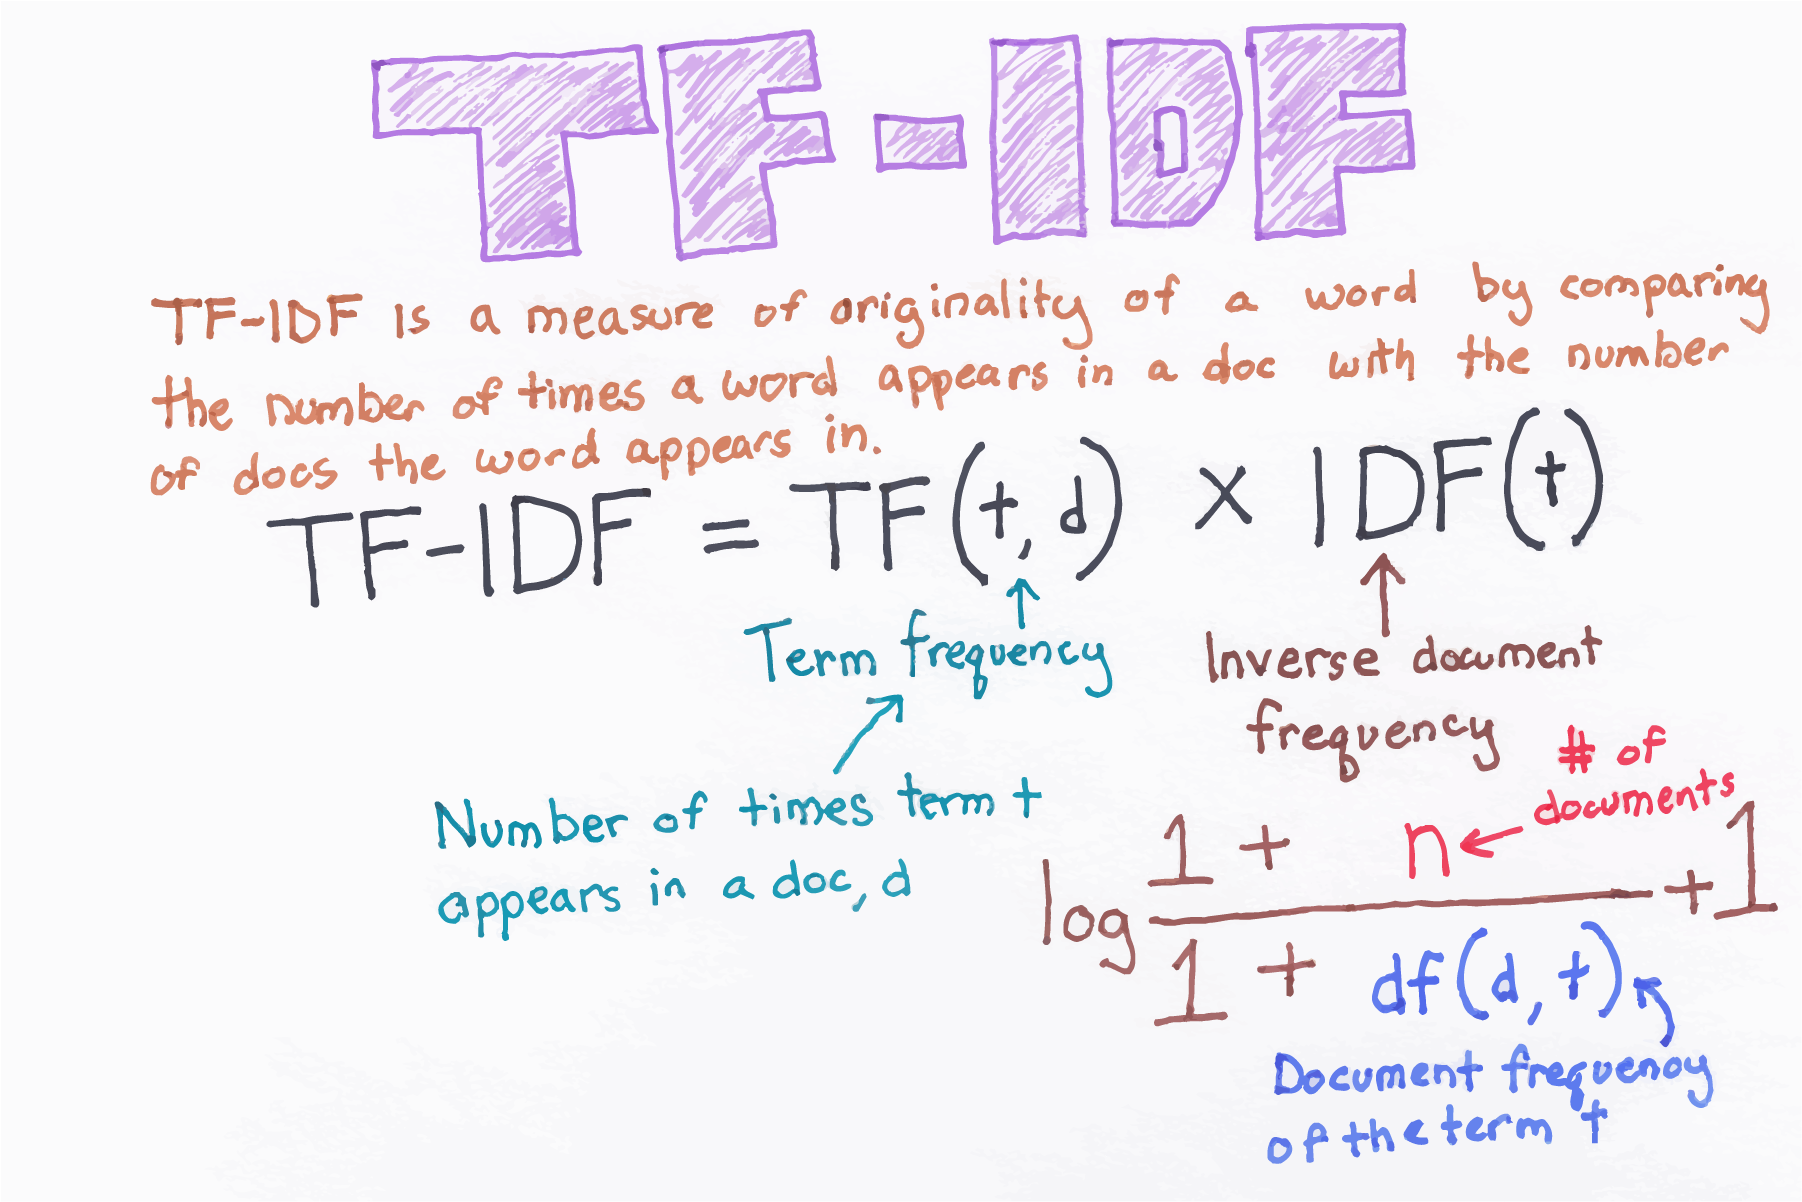

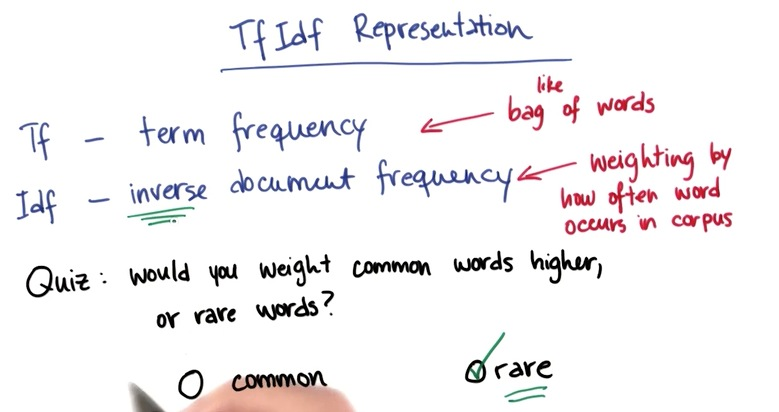

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

x_parent = tf.fit_transform(parents.parent_why_child_stopped)

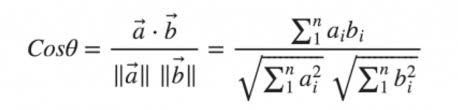

In [96]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(x_parent);len(cosine_similarity(x_parent))

first = cosine_similarity(x_parent)[0]

first.sort()

In [97]:
parents.iloc[0].values

array(["SEND HIM BUT DON'T WANT TO GO TO SCHOOL"], dtype=object)

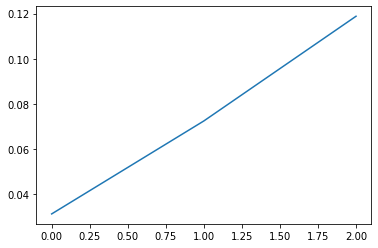

In [98]:
plt.plot(first[700:1000:100])

In [99]:
parents.iloc[0]['parent_why_child_stopped']

"SEND HIM BUT DON'T WANT TO GO TO SCHOOL"

In [100]:
set(parents[700:1000:100]['parent_why_child_stopped'])

{'GOING TO COMPANY',
 'HE HAS FAIL IN STD. 10TH SO HE IS NOT GOING TO SCHOOL',
 'Lack of interest in study, Engaged in Household Work'}

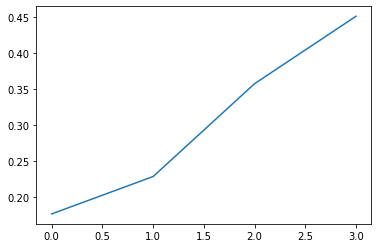

In [101]:
plt.plot(first[950:1150:50])

In [102]:
parents.iloc[0]['parent_why_child_stopped']

"SEND HIM BUT DON'T WANT TO GO TO SCHOOL"

In [103]:
set(parents[1000:1150:50]['parent_why_child_stopped'])

{'MIGRATED ',
 'PARENTS  SENDING HIM SCHOOL BUT HE DOES  NOT WANT  TO SCHOOL.',
 'WE DO NOT TEACH TOO MUCH IN OUR CAST'}

In [104]:
cosine_similarity(x_parent)

array([[1.        , 0.42796119, 0.47946567, ..., 0.        , 0.20276233,
        0.20276233],
       [0.42796119, 1.        , 0.24324336, ..., 0.        , 0.19691276,
        0.19691276],
       [0.47946567, 0.24324336, 1.        , ..., 0.        , 0.15500673,
        0.15500673],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.20276233, 0.19691276, 0.15500673, ..., 0.        , 1.        ,
        1.        ],
       [0.20276233, 0.19691276, 0.15500673, ..., 0.        , 1.        ,
        1.        ]])

In [105]:
from sklearn.manifold import TSNE
#to get the first col of the matrix
def column(matrix, i):
    return [row[i] for row in matrix]

def show_tsne(x):
  tsne = TSNE()
  twod_data = tsne.fit_transform(cosine_similarity(x_parent))
  print('Below is the example of how our reduced matrix looks like')
  print(twod_data[0])
  print(type(twod_data))
  _ = plt.figure(figsize=(12,9))
  return(plt.scatter(x = column(twod_data,0),y = column(twod_data,1),alpha=.3))

Below is the example of how our reduced matrix looks like
[-32.314728    0.6208199]
<class 'numpy.ndarray'>


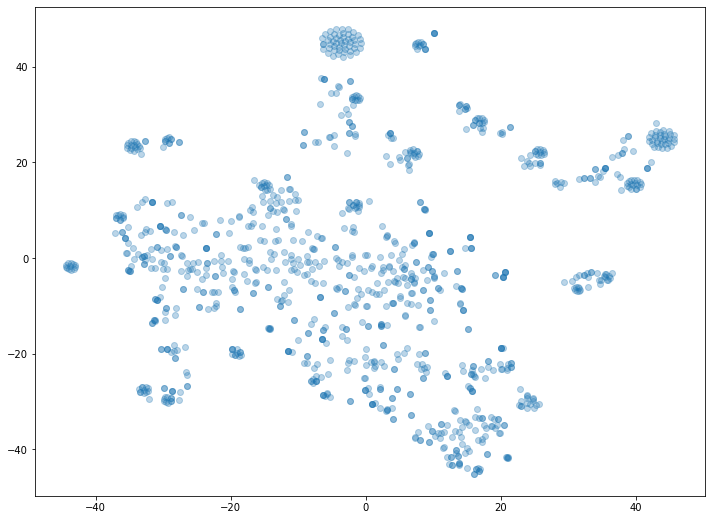

In [106]:
show_tsne(cosine_similarity(x_parent))

In [107]:
from sklearn.decomposition import PCA

#to get the first col of the matrix
def column(matrix, i):
    return [row[i] for row in matrix]

def show_pca(x):
  pca = PCA(n_components=2,)

  twod_data = pca.fit_transform(cosine_similarity(x_parent))
  print('Below is the example of how our reduced matrix looks like')
  print(twod_data[0])
  print(type(twod_data))
  _ = plt.figure(figsize=(12,9))
  return(plt.scatter(x = column(twod_data,0),y = column(twod_data,1),alpha=.3))

Below is the example of how our reduced matrix looks like
[-2.67512643 -0.62904909]
<class 'numpy.ndarray'>


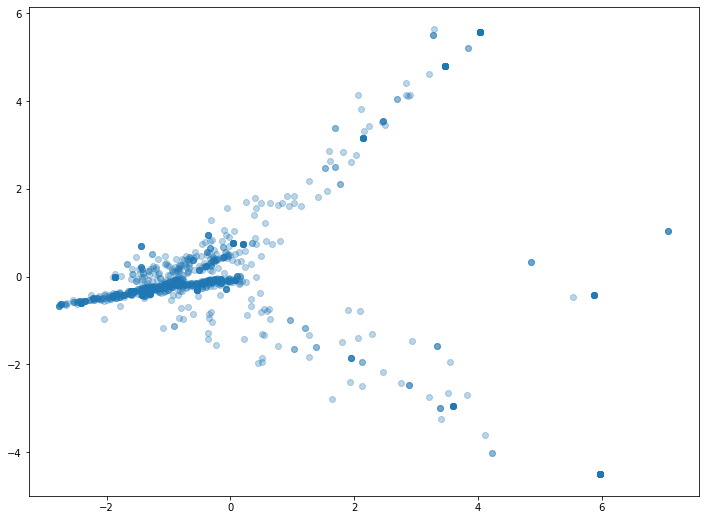

In [108]:
show_pca(cosine_similarity(x_parent))